In [1]:
import pandas as pd

df_wifi = pd.read_csv('privamov/privamov-wifi', sep='\t', nrows=100000, header=None, names=['id', 'timestamp','wifi'])

In [2]:
df_wifi

,id,timestamp,wifi
0,1,2014-10-06 12:56:50.5,84:a6:c8:a9:c2:d9
1,1,2014-10-06 12:56:50.51,9c:1c:12:24:b4:d1
2,1,2014-10-06 12:56:50.515,9c:1c:12:24:af:31
3,1,2014-10-06 12:56:50.516,9c:1c:12:2b:c3:f1
4,1,2014-10-04 19:43:14.986,20:e5:2a:5b:bf:e0
...,...,...,...
99995,1,2014-11-27 18:34:28.154,00:0b:86:e1:25:e3
99996,1,2014-11-27 18:34:28.158,00:0b:86:e1:25:e0
99997,1,2014-11-27 18:34:28.164,2e:c0:39:b5:ac:5f
99998,1,2014-11-27 18:34:28.171,2e:c0:39:b5:ac:5c


In [3]:
df_wifi_update=pd.DataFrame({'count' : df_wifi.groupby( [ "wifi", "id"] ).size()}).reset_index()
df_wifi_update

,wifi,id,count
0,00:03:52:af:00:10,1,14
1,00:03:52:af:00:11,1,1
2,00:04:e2:e1:f7:30,1,2
3,00:06:25:4a:e0:a6,7,2
4,00:07:cb:01:13:24,7,4
...,...,...,...
5287,fe:77:dc:ba:af:68,1,19
5288,fe:77:dc:ba:af:69,1,18
5289,fe:77:dc:ba:af:6a,1,20
5290,fe:77:dc:ba:af:6b,1,17


In [4]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 

In [5]:
df_value_counts

,wifi_unique,Nb_Id
0,8a:8b:c5:d4:a6:78,3
1,36:87:24:79:2a:62,3
2,96:fe:f4:a3:3a:58,3
3,9c:1c:12:2b:c4:70,3
4,9c:1c:12:2b:c4:71,3
...,...,...
5018,04:1e:64:eb:d1:90,1
5019,f4:ca:e5:e2:fb:bc,1
5020,f4:ca:e5:a9:5e:79,1
5021,00:24:d4:59:45:e9,1


In [6]:
for i in range(len(df_wifi_update)):
    if(int(df_value_counts[ df_value_counts['wifi_unique'] == df_wifi_update["wifi"][i] ]["Nb_Id"]) == 1 ) :
        df_wifi_update=df_wifi_update.drop([i])




    

In [7]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 
df_val_counts

,wifi
c4:04:15:3d:fc:32,3
00:26:44:f0:d7:bb,3
9c:1c:12:2b:b1:50,3
16:ef:08:09:85:28,3
9c:1c:12:2b:b7:a0,3
...,...
00:1a:1e:cf:81:a0,2
86:7d:ce:49:9a:6c,2
00:0b:86:6d:cc:03,2
14:0c:76:75:fa:fc,2


In [8]:
""" a=df_wifi_update[df_wifi_update["wifi"] == "9c:1c:12:2b:c3:f1"]

df_val_counts = pd.DataFrame(a)
df_value_counts_test = df_val_counts.reset_index()
df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
 """

' a=df_wifi_update[df_wifi_update["wifi"] == "9c:1c:12:2b:c3:f1"]\n\ndf_val_counts = pd.DataFrame(a)\ndf_value_counts_test = df_val_counts.reset_index()\ndf_value_counts_test.columns = [\'supprimer\',\'wifi\',\'id\', \'count\'] \ndf_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])\n '

In [9]:
"""df_value_counts_test"""

'df_value_counts_test'

In [53]:
final = pd.DataFrame(columns = ['ID1', 'ID2', 'length','wifi'])

In [54]:
s=0
for wifi in range(len(df_value_counts)):
    element= df_wifi_update[df_wifi_update["wifi"] == df_value_counts['wifi_unique'][wifi]]
    df_val_counts = pd.DataFrame(element)
    df_value_counts_test = df_val_counts.reset_index()
    df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
    df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
    for i in range(len(df_value_counts_test)):
        j=i+1
        while(j <len(df_value_counts_test)):
            final.loc[s]=[df_value_counts_test["id"][i],df_value_counts_test["id"][j],min(df_value_counts_test["count"][i],df_value_counts_test["count"][j]),df_value_counts_test["wifi"][i]]
            j=j+1
            s+=1

        

In [55]:
final

,ID1,ID2,length,wifi
0,1,2,1,c4:04:15:3d:fc:32
1,1,7,67,c4:04:15:3d:fc:32
2,2,7,1,c4:04:15:3d:fc:32
3,1,2,2,00:26:44:f0:d7:bb
4,1,7,2,00:26:44:f0:d7:bb
...,...,...,...,...
305,1,7,2,00:1a:1e:cf:81:a0
306,1,7,2,86:7d:ce:49:9a:6c
307,1,7,2,00:0b:86:6d:cc:03
308,1,7,2,14:0c:76:75:fa:fc


In [56]:
resultt=pd.DataFrame({'Nbre-repeat' : final.groupby( [ "ID1", "ID2"] ).size()}).reset_index()

result=final.groupby(['ID1', 'ID2']).sum()['length'].reset_index()

In [57]:
resultt

,ID1,ID2,Nbre-repeat
0,1,2,23
1,1,6,33
2,1,7,204
3,2,7,21
4,6,7,29


In [58]:
result

,ID1,ID2,length
0,1,2,25
1,1,6,113
2,1,7,3124
3,2,7,22
4,6,7,77


In [59]:

import networkx as nx

G = nx.from_pandas_edgelist(df=result, source='ID1', target='ID2', edge_attr='length')

G.add_nodes_from(nodes_for_adding=result.ID1.tolist())

In [60]:
G.edges(data=True)

EdgeDataView([(1, 2, {'length': 25}), (1, 6, {'length': 113}), (1, 7, {'length': 3124}), (2, 7, {'length': 22}), (6, 7, {'length': 77})])

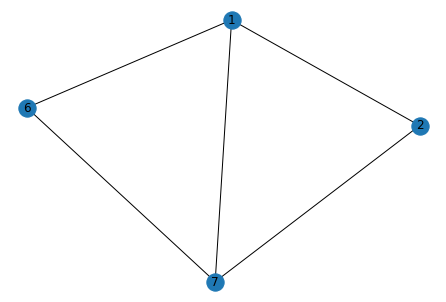

In [69]:
weights = [i['length']/100 for i in dict(G.edges).values()]

nx.draw(G, with_labels = True)